# Lasso Regression on Titanic Dataset

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset
%matplotlib inline
plt.style.use('ggplot')

In [38]:
data = load_dataset("titanic")
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [39]:
columns = ['alive', 'alone', 'embark_town', 'who', 'adult_male', 'deck']
data.drop(columns, axis=1, inplace=True)

In [40]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
sibsp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
embarked,889,3,S,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,891,3,Third,491,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
bins = [0, 5, 17, 25, 50, 80]
labels = ['Infant', 'Kid', 'Young', 'Adult', 'Old']
data['age'] = pd.cut(data['age'], bins = bins, labels=labels)

In [42]:
pd.DataFrame(data['age'].value_counts())

,age
Adult,349
Young,188
Kid,69
Old,64
Infant,44


In [43]:
data_2 = data['age'].mode()[0]
data_2

'Adult'

In [44]:
data = data.fillna({'age' : data['age'].mode()[0]})

In [45]:
data['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [46]:
data = data.fillna({'embarked' : 'S'})

In [47]:
bins = [-1, 8, 15, 31, 513]
labels = ['low', 'medium-low', 'medium', 'high']
data['fare'] = pd.cut(data["fare"], bins = bins, labels = labels)

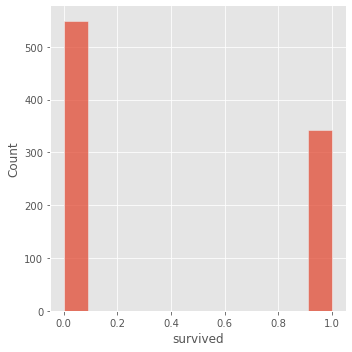

In [48]:
data.drop('class', axis = 1, inplace = True)
sns.displot(data['survived'])

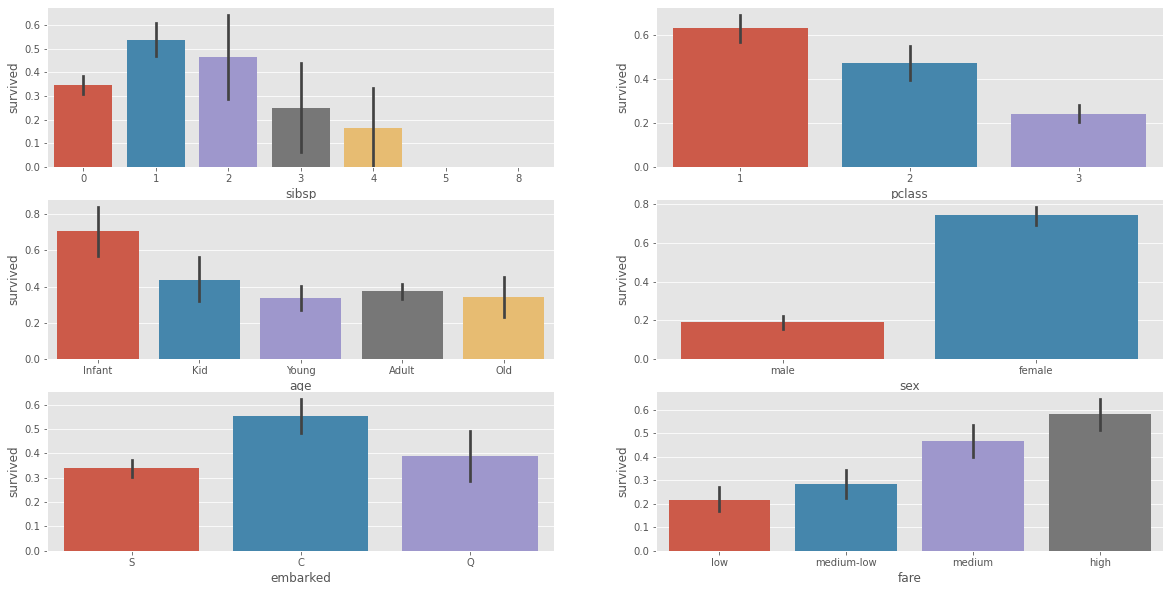

In [49]:
plt.figure(figsize=(20, 10))
plt.subplot(321)
sns.barplot(x = 'sibsp', y = 'survived', data = data)
plt.subplot(322)
sns.barplot(x = 'pclass', y = 'survived', data = data)
plt.subplot(323)
sns.barplot(x = 'age', y = 'survived', data = data)
plt.subplot(324)
sns.barplot(x = 'sex', y = 'survived', data = data)
plt.subplot(325)
sns.barplot(x = 'embarked', y = 'survived', data = data);
plt.subplot(326)
sns.barplot(x = 'fare', y = 'survived' , data = data);

## We'll use get_dummies to convert non-numeric values to numeric values.

In [50]:
dummies = ['fare', 'age', 'embarked', 'sex']
dummies_data = pd.get_dummies(data[dummies])

In [51]:
dummies_data.shape

(891, 14)

### We will concat two data frames, and drop the old columns.

In [52]:
data = pd.concat([data, dummies_data], axis = 1)
data.drop(dummies, axis = 1, inplace = True)

# Spliting into Train and Test dataset

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [54]:
X = data.drop('survived', axis = 1)
y = data['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

## Training the model

In [63]:
reg = LassoCV(cv=5, random_state=0, max_iter=10000)

In [64]:
reg.fit(X_train, y_train)

LassoCV(cv=5, max_iter=10000, random_state=0)

In [65]:
reg.alpha_

0.002133598887447779

In [67]:
regressor = Lasso(alpha = reg.alpha_)
regressor.fit(X_train, y_train)

Lasso(alpha=0.002133598887447779)

In [68]:
y_pred = regressor.predict(X_test)
y_pred

array([ 0.16173921,  0.1196113 ,  0.01182727,  0.95482893,  0.6760772 ,
        0.44690422,  0.93347852,  0.87971507,  0.40390079,  0.7016625 ,
        0.07366296,  0.75875031,  0.16189192,  0.79076812,  0.96460159,
        0.66679604,  0.05826479,  0.16016293,  0.09444047,  0.42709258,
        0.20782217,  0.89730284,  0.16189192,  0.44690422,  0.57301725,
        0.9279472 ,  0.1196113 ,  0.59818808,  0.74904189,  0.76316854,
        0.16173921,  0.75875031,  0.09444047,  0.41872606,  0.07366296,
        0.51420296,  0.1196113 ,  0.24399785,  0.20782217,  0.11850729,
        0.28770418,  0.15073436,  0.09444047, -0.05863151,  0.88753018,
        0.1196113 ,  0.1196113 ,  0.81894145,  0.24399785,  0.22040543,
        0.44690422,  0.4229674 ,  1.03150433,  0.08343562,  0.51420296,
        0.14109632,  0.32141366,  0.42923922, -0.01138674,  0.09817339,
        0.15073436,  0.555015  ,  0.82933836,  0.48602481,  0.55542948,
        0.16189192,  0.96165668,  0.24228695,  1.03150433,  0.92

# Accuracy of the model

In [69]:
import numpy as np

In [70]:
# Using RMSLE => Root Mean Square Logarithmic Error
error = np.square(np.log10(y_pred +1) - np.log10(y_test +1)).mean() ** 0.5
error

0.11578006535440064

In [71]:
# Accuracy of the model.
# Subtract error from 1 and multiplying by 100.

print("Accuracy is the model", (1-error)*100, "%")

Accuracy is the model 88.42199346455993 %
